# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cabo san lucas
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | bata
Processing Record 4 of Set 1 | papatowai
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | antofagasta
Processing Record 7 of Set 1 | ostersund
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | hawaiian paradise park
Processing Record 10 of Set 1 | taiohae
City not found. Skipping...
Processing Record 11 of Set 1 | san julian
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | el fasher
Processing Record 14 of Set 1 | dijkot
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | khandud
Processing Record 21 of Set 1 | vilyuchinsk


Processing Record 41 of Set 4 | carnarvon
Processing Record 42 of Set 4 | whitehorse
Processing Record 43 of Set 4 | warman
Processing Record 44 of Set 4 | thaton
Processing Record 45 of Set 4 | kenai
Processing Record 46 of Set 4 | aktau
Processing Record 47 of Set 4 | kabompo
Processing Record 48 of Set 4 | rabaul
Processing Record 49 of Set 4 | gray
Processing Record 0 of Set 5 | petrozavodsk
Processing Record 1 of Set 5 | tete
Processing Record 2 of Set 5 | aasiaat
Processing Record 3 of Set 5 | kendari
Processing Record 4 of Set 5 | point fortin
Processing Record 5 of Set 5 | san luis de la loma
Processing Record 6 of Set 5 | tura
Processing Record 7 of Set 5 | colonia
Processing Record 8 of Set 5 | chapadinha
Processing Record 9 of Set 5 | nelson bay
Processing Record 10 of Set 5 | richards bay
Processing Record 11 of Set 5 | hagere maryam
Processing Record 12 of Set 5 | kotabumi
Processing Record 13 of Set 5 | sanya
Processing Record 14 of Set 5 | daru
Processing Record 15 of Se

Processing Record 34 of Set 8 | priob'ye
Processing Record 35 of Set 8 | kalmunai
Processing Record 36 of Set 8 | magdagachi
Processing Record 37 of Set 8 | krasnokholmskiy
Processing Record 38 of Set 8 | peniche
Processing Record 39 of Set 8 | lodja
Processing Record 40 of Set 8 | frontera
Processing Record 41 of Set 8 | assab
Processing Record 42 of Set 8 | taroa
Processing Record 43 of Set 8 | dahegam
Processing Record 44 of Set 8 | el granada
Processing Record 45 of Set 8 | east ballina
Processing Record 46 of Set 8 | ushibukamachi
Processing Record 47 of Set 8 | chinsali
Processing Record 48 of Set 8 | karkira
Processing Record 49 of Set 8 | kulhudhuffushi
Processing Record 0 of Set 9 | menongue
Processing Record 1 of Set 9 | magangue
Processing Record 2 of Set 9 | jinchang
Processing Record 3 of Set 9 | el calafate
Processing Record 4 of Set 9 | aneho
Processing Record 5 of Set 9 | siavonga
Processing Record 6 of Set 9 | franklin
Processing Record 7 of Set 9 | tamanrasset
Process

Processing Record 20 of Set 12 | swakopmund
Processing Record 21 of Set 12 | kirensk
Processing Record 22 of Set 12 | kachkanar
Processing Record 23 of Set 12 | along
Processing Record 24 of Set 12 | zouerate
Processing Record 25 of Set 12 | zhetybay
City not found. Skipping...
Processing Record 26 of Set 12 | luwingu
Processing Record 27 of Set 12 | dadonghai
City not found. Skipping...
Processing Record 28 of Set 12 | kavieng
Processing Record 29 of Set 12 | ain sukhna
Processing Record 30 of Set 12 | cassia
Processing Record 31 of Set 12 | ust'-charyshskaya pristan'
Processing Record 32 of Set 12 | tromso
Processing Record 33 of Set 12 | pandan
Processing Record 34 of Set 12 | maintirano
Processing Record 35 of Set 12 | baiti
Processing Record 36 of Set 12 | kurumkan
Processing Record 37 of Set 12 | nampula
Processing Record 38 of Set 12 | sandnessjoen
Processing Record 39 of Set 12 | sweetwater
Processing Record 40 of Set 12 | port blair
Processing Record 41 of Set 12 | hirado
Proc

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cabo san lucas,22.8909,-109.9124,36.45,60,6,3.91,MX,1687974672
1,waitangi,-43.9535,-176.5597,12.12,96,77,1.34,NZ,1687974672
2,bata,1.8639,9.7658,26.45,79,98,6.38,GQ,1687974672
3,papatowai,-46.5619,169.4708,8.06,91,100,3.93,NZ,1687974673
4,adamstown,-25.0660,-130.1015,19.91,72,90,12.08,PN,1687974673


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cabo san lucas,22.8909,-109.9124,36.45,60,6,3.91,MX,1687974672
1,waitangi,-43.9535,-176.5597,12.12,96,77,1.34,NZ,1687974672
2,bata,1.8639,9.7658,26.45,79,98,6.38,GQ,1687974672
3,papatowai,-46.5619,169.4708,8.06,91,100,3.93,NZ,1687974673
4,adamstown,-25.0660,-130.1015,19.91,72,90,12.08,PN,1687974673


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

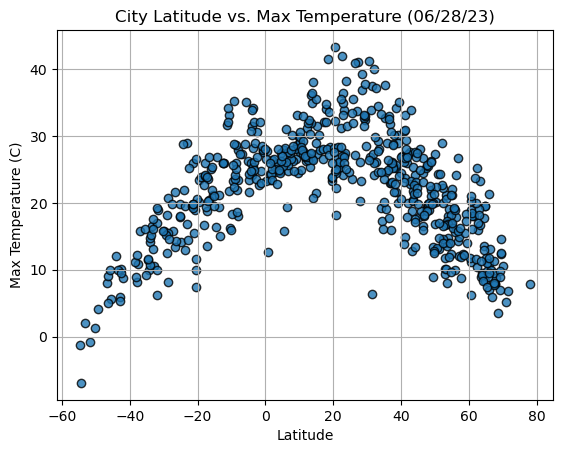

In [50]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],
            city_data_df["Max Temp"],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

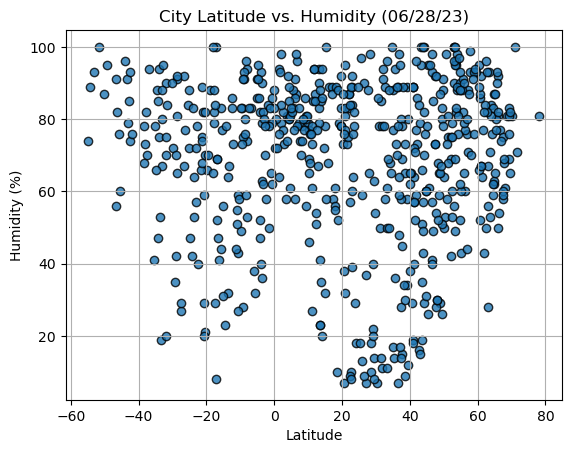

In [51]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],
            city_data_df["Humidity"],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

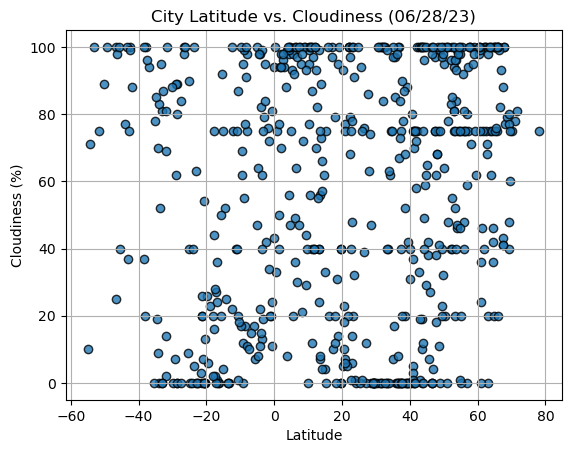

In [52]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],
            city_data_df["Cloudiness"],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

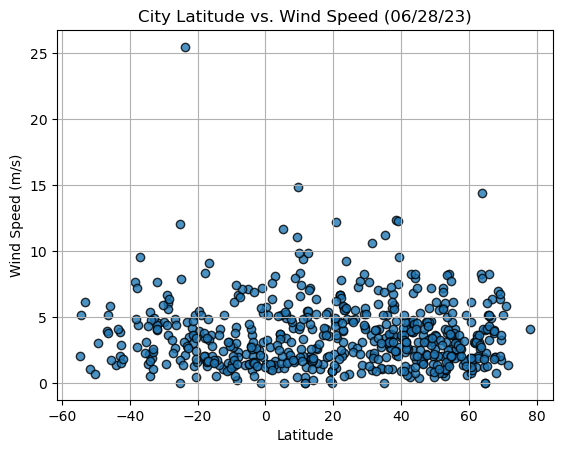

In [53]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],
            city_data_df["Wind Speed"],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, y_label, title, coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    print(f"The r-value is: {rvalue}")
    
    
    

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cabo san lucas,22.8909,-109.9124,36.45,60,6,3.91,MX,1687974672
2,bata,1.8639,9.7658,26.45,79,98,6.38,GQ,1687974672
6,ostersund,63.1792,14.6357,23.25,28,20,2.57,SE,1687974673
8,hawaiian paradise park,19.5933,-154.9731,23.28,92,0,0.00,US,1687974674
9,san julian,21.0167,-102.1667,26.53,32,6,3.40,MX,1687974674


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,12.12,96,77,1.34,NZ,1687974672
3,papatowai,-46.5619,169.4708,8.06,91,100,3.93,NZ,1687974673
4,adamstown,-25.0660,-130.1015,19.91,72,90,12.08,PN,1687974673
5,antofagasta,-23.6500,-70.4000,19.60,64,5,2.08,CL,1687974673
7,edinburgh of the seven seas,-37.0676,-12.3116,15.76,94,94,9.53,SH,1687974673


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.673955431274897


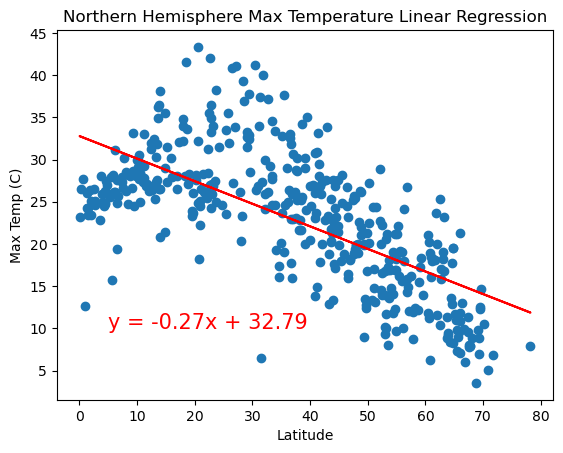

In [33]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], 
                       northern_hemi_df["Max Temp"], 
                       "Max Temp (C)", 
                       "Northern Hemisphere Max Temperature Linear Regression", 
                       (5, 10)
                      )

The r-value is: 0.8522040317228036


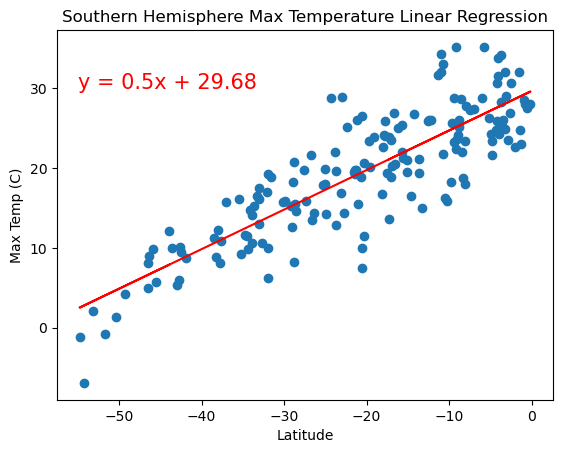

In [34]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], 
                       southern_hemi_df["Max Temp"], 
                       "Max Temp (C)", 
                       "Southern Hemisphere Max Temperature Linear Regression", 
                       (-55, 30)
                      )

**Discussion about the linear relationship:** 
They are opposite because the closer to the equator (Lat 0) the hotter the temperature. Northern hemisphere starts at the equator and goes further away by lattitude getting colder as the lattitude number goes up. Southern Hemisphere starts further away due to the negative number lattitude and gets warmer the closer to the equator (Lat 0).

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0313204590115096


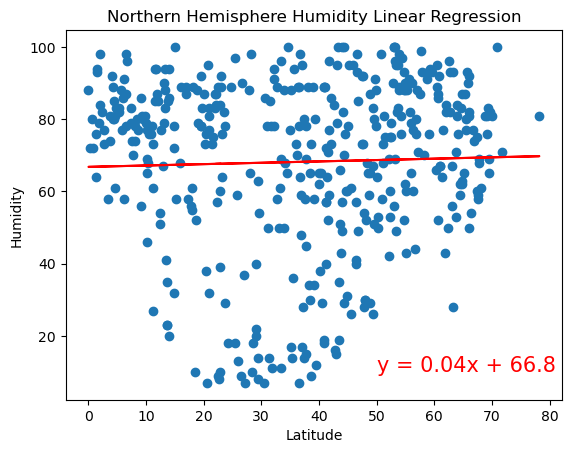

In [36]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], 
                       northern_hemi_df["Humidity"], 
                       "Humidity (%)", 
                       "Northern Hemisphere Humidity Linear Regression", 
                       (50, 10)
                      )

The r-value is: -0.14315836732212123


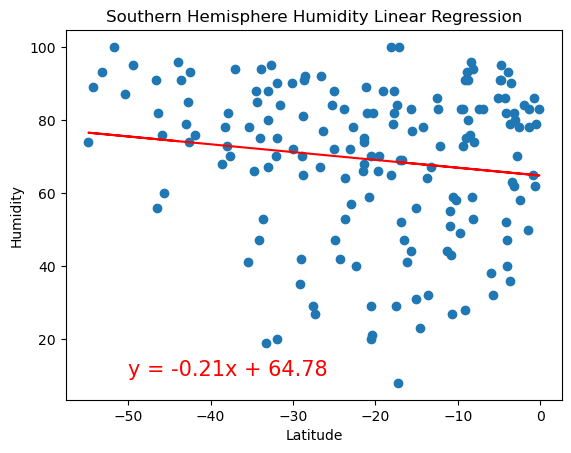

In [39]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], 
                       southern_hemi_df["Humidity"], 
                       "Humidity (%)", 
                       "Southern Hemisphere Humidity Linear Regression", 
                       (-50, 10)
                      )

**Discussion about the linear relationship:** The linear regression is rather flat. This could be because of humidity's relationship to seasons so it would remain quite consistent across the hemisphere. Northern Hemisphere is all currently in summer and Southern Hemisphere is currently in winter.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.07507028853934881


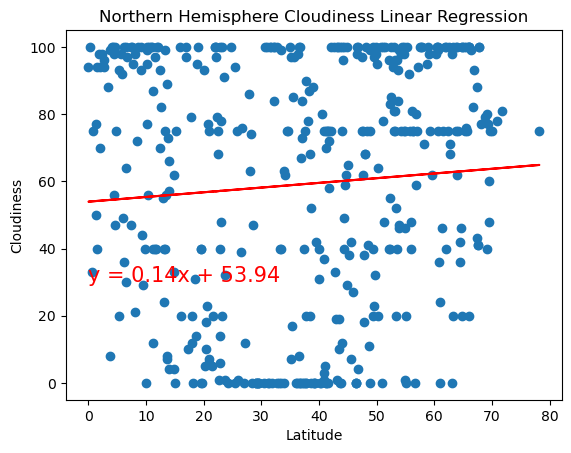

In [43]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], 
                       northern_hemi_df["Cloudiness"], 
                       "Cloudiness (%)", 
                       "Northern Hemisphere Cloudiness Linear Regression", 
                       (0, 30)
                      )

The r-value is: -0.18188497996342873


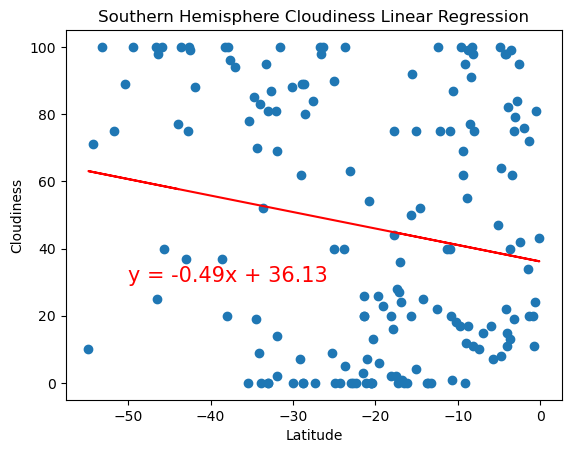

In [45]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], 
                       southern_hemi_df["Cloudiness"], 
                       "Cloudiness (%)", 
                       "Southern Hemisphere Cloudiness Linear Regression", 
                       (-50, 30)
                      )

**Discussion about the linear relationship:** According to NASA, descending air inhibits cloud formation. This is most common between 15 and 30 degrees north and south of the equator so that is why we see a slight trend of less clouds towards the equator (Lat 0)

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.0648935676479045


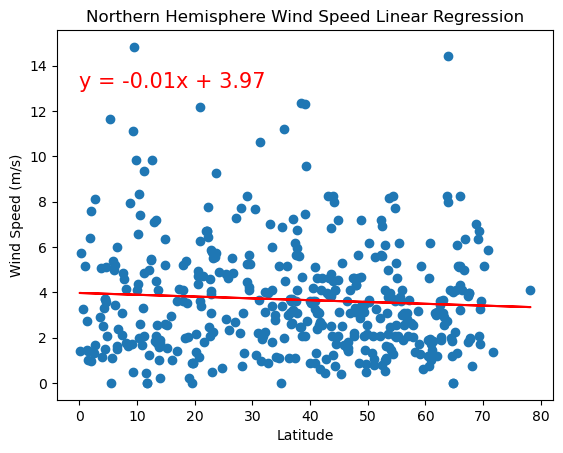

In [49]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], 
                       northern_hemi_df["Wind Speed"], 
                       "Wind Speed (m/s)", 
                       "Northern Hemisphere Wind Speed Linear Regression", 
                       (0, 13)
                      )

The r-value is: -0.1317971101829364


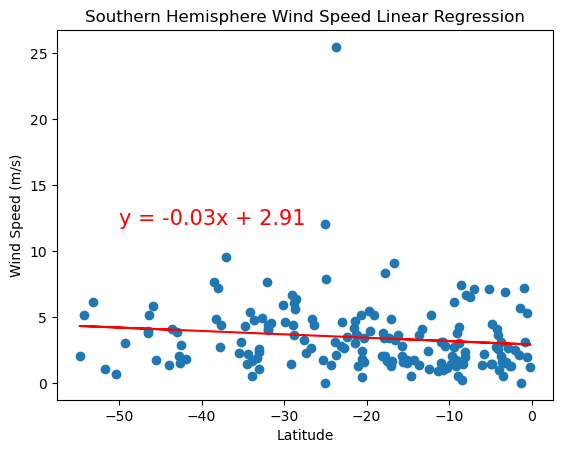

In [48]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], 
                       southern_hemi_df["Wind Speed"], 
                       "Wind Speed (m/s)", 
                       "Southern Hemisphere Wind Speed Linear Regression", 
                       (-50, 12)
                      )

**Discussion about the linear relationship:** Soutern hemisphere seems to have the lower windspeed on average and slighty decreases the closer to the equator (Lat 0). This could be due to the Coriolis Effect and the lower pressure at the equator. The North hemisphere trend of slightly increasing away from the equator could be because it is the hemisphere with the majority of the land mass and air pressure is higher over land.